In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor


In [193]:
flight = pd.read_excel("C:/Users/Dell/Downloads/Flight .xlsx")

In [194]:
flight.head(5)

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8.0,On,L,5.0
1,Kevin,kevin,23.0,16.0,B,U,8.0,On,L,5.0
2,Kevin,RR,NaN,18.0,A,L,10.0,On,R,6.0
3,Priya,Nithya,27.0,20.0,A,U,10.0,On,R,4.0
4,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,8.0


In [195]:
flight.tail(5)

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
83,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,7.0
84,Priya,Sathana,NaN,18.5,B,L,5.0,Off,R,5.0
85,Priya,Yogashree,30.0,19.0,NaN,U,8.0,Off,R,4.0
86,Giri,giri,25.0,17.0,B,U,8.0,On,R,5.0
87,Giri,Kiruthik,28.5,20.5,B,L,8.0,Off,R,7.0


In [121]:
flight.shape

(88, 10)

In [122]:
flight.describe()

,Length,Breadth,Foldings,Distance
count,71.000000,88.000000,88.000000,88.000000
mean,26.708451,18.500000,8.136364,6.090909
std,11.920268,1.339068,1.736570,1.974762
min,0.000000,16.000000,5.000000,1.000000
25%,22.500000,17.500000,8.000000,5.000000
50%,28.500000,18.500000,8.000000,6.000000
75%,29.500000,20.000000,10.000000,7.000000
max,98.000000,20.500000,10.000000,11.000000


In [123]:
flight.columns

Index(['Person', 'Item_Identifier', 'Length', 'Breadth', 'PaperQuality',
       'Angle', 'Foldings', 'Windspeed ', 'Dominanthand', 'Distance'],
      dtype='object')

In [124]:
flight.nunique

<bound method DataFrame.nunique of    Person Item_Identifier  Length  Breadth PaperQuality Angle  Foldings  \
0   Kevin             Som    29.0     20.0            A     U       8.0   
1   Kevin           kevin    23.0     16.0            B     U       8.0   
2   Kevin              RR     NaN     18.0            A     L      10.0   
3   Priya          Nithya    27.0     20.0            A     U      10.0   
4   Priya           Priya    29.5     17.5            B     U       5.0   
..    ...             ...     ...      ...          ...   ...       ...   
83  Priya           Priya    29.5     17.5            B     U       5.0   
84  Priya         Sathana     NaN     18.5            B     L       5.0   
85  Priya       Yogashree    30.0     19.0          NaN     U       8.0   
86   Giri            giri    25.0     17.0            B     U       8.0   
87   Giri        Kiruthik    28.5     20.5            B     L       8.0   

   Windspeed  Dominanthand  Distance  
0          On            

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

In [126]:
flight.Length.fillna(flight.Length.median(),inplace = True)



In [127]:
flight.Length.isnull().sum()


0

In [128]:
flight.PaperQuality.fillna('others',inplace = True)

In [129]:
flight.PaperQuality.isnull().sum()

0

In [130]:
flight.Angle.fillna('others',inplace = True)



In [131]:
flight.Angle.isnull().sum()


0

checking for outlier

    

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2b717ddf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2b717dc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2b6fee7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2b71b71c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2b71b7550>],
 'means': []}

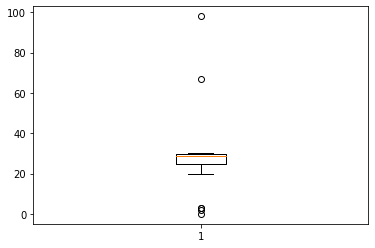

In [132]:
plt.boxplot(flight.Length)

In [133]:
q3 = flight.Length.quantile(0.75)
q1 = flight.Length.quantile(0.25)
iqr=q3-q1
print(iqr)

5.0


In [134]:
ue=q3+1.5*(iqr)
print(ue)
le=q1-1.5*(iqr)
print(le)

37.0
17.0


In [135]:
flight[(flight.Length<ue)&(flight.Length>le)]

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8.0,On,L,5.0
1,Kevin,kevin,23.0,16.0,B,U,8.0,On,L,5.0
2,Kevin,RR,28.5,18.0,A,L,10.0,On,R,6.0
3,Priya,Nithya,27.0,20.0,A,U,10.0,On,R,4.0
4,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,8.0
...,...,...,...,...,...,...,...,...,...,...
83,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,7.0
84,Priya,Sathana,28.5,18.5,B,L,5.0,Off,R,5.0
85,Priya,Yogashree,30.0,19.0,others,U,8.0,Off,R,4.0
86,Giri,giri,25.0,17.0,B,U,8.0,On,R,5.0


In [136]:
flight.Length[flight.Length>ue]=ue
flight.Length[flight.Length<le]=le

C:\Users\Dell\AppData\Local\Temp/ipykernel_14940/2714562716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Length[flight.Length>ue]=ue
C:\Users\Dell\AppData\Local\Temp/ipykernel_14940/2714562716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Length[flight.Length<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x1b2b720d850>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2b720df70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2b720d4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2b721b6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2b721ba60>],
 'means': []}

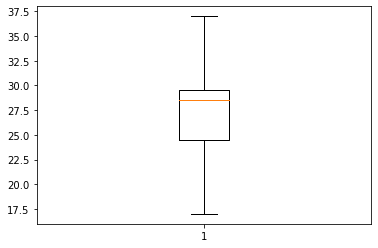

In [137]:

plt.boxplot(flight.Length)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Person', ylabel='count'>

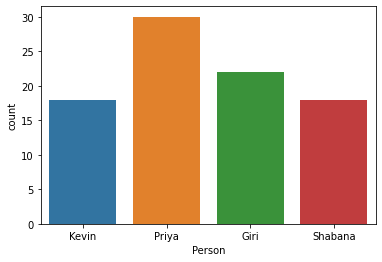

In [138]:
sns.countplot('Person',data=flight)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

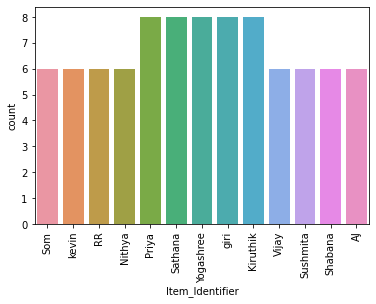

In [139]:

plt.xticks(rotation='vertical')
sns.countplot('Item_Identifier',data=flight)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2b7362130>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2b7362850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2b7353d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2b7362f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2b736f340>],
 'means': []}

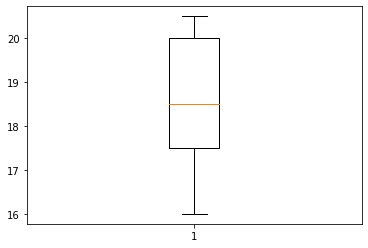

In [140]:
plt.boxplot(flight.Breadth)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dominanthand', ylabel='count'>

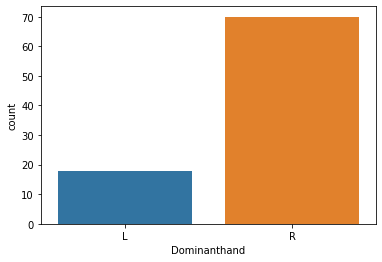

In [141]:

sns.countplot('Dominanthand',data=flight)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2b74211f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2b74217c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2b7411e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2b7421ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2b742d2b0>],
 'means': []}

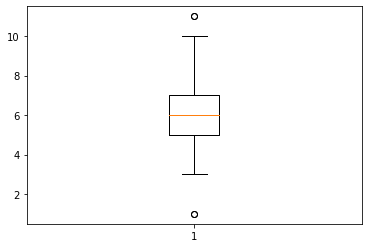

In [142]:

plt.boxplot(flight.Distance)

In [143]:
q3=flight.Distance.quantile(0.75)
q1=flight.Distance.quantile(0.25)
iqr=q3-q1
print(iqr)


2.0


In [144]:
ue=q3+1.5*(iqr)
print(ue)
le=q1-1.5*(iqr)
print(le)

10.0
2.0


In [145]:
flight[(flight.Distance<ue)&(flight.Distance>le)]


,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8.0,On,L,5.0
1,Kevin,kevin,23.0,16.0,B,U,8.0,On,L,5.0
2,Kevin,RR,28.5,18.0,A,L,10.0,On,R,6.0
3,Priya,Nithya,27.0,20.0,A,U,10.0,On,R,4.0
4,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,8.0
...,...,...,...,...,...,...,...,...,...,...
83,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,7.0
84,Priya,Sathana,28.5,18.5,B,L,5.0,Off,R,5.0
85,Priya,Yogashree,30.0,19.0,others,U,8.0,Off,R,4.0
86,Giri,giri,25.0,17.0,B,U,8.0,On,R,5.0


In [146]:
flight.Distance[flight.Distance>ue]=ue
flight.Distance[flight.Distance<le]=le-

C:\Users\Dell\AppData\Local\Temp/ipykernel_14940/1934008714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Distance[flight.Distance>ue]=ue
C:\Users\Dell\AppData\Local\Temp/ipykernel_14940/1934008714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Distance[flight.Distance<le]=le


{'whiskers': [<matplotlib.lines.Line2D at 0x1b2b74853a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2b7485a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2b7476fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2b7492160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2b74924f0>],
 'means': []}

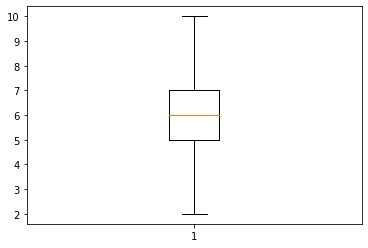

In [147]:

plt.boxplot(flight.Distance)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperQuality', ylabel='count'>

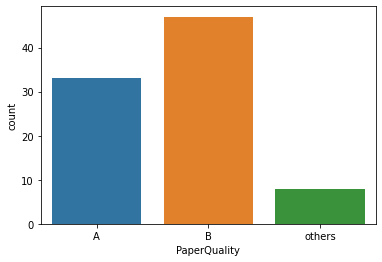

In [148]:
sns.countplot('PaperQuality',data=flight)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle', ylabel='count'>

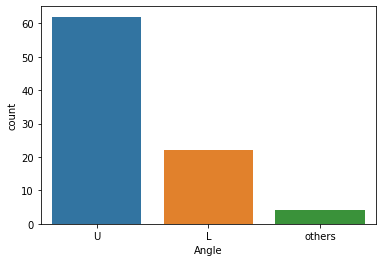

In [149]:

sns.countplot('Angle',data=flight)

In [150]:

pd.get_dummies(flight.Person)

,Giri,Kevin,Priya,Shabana
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
83,0,0,1,0
84,0,0,1,0
85,0,0,1,0
86,1,0,0,0


In [151]:
dummy = pd.get_dummies(flight)
dummy

,Length,Breadth,Foldings,Distance,Person_Giri,Person_Kevin,Person_Priya,Person_Shabana,Item_Identifier_AJ,Item_Identifier_Kiruthik,...,PaperQuality_A,PaperQuality_B,PaperQuality_others,Angle_L,Angle_U,Angle_others,Windspeed _Off,Windspeed _On,Dominanthand_L,Dominanthand_R
0,29.0,20.0,8.0,5.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,23.0,16.0,8.0,5.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,28.5,18.0,10.0,6.0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
3,27.0,20.0,10.0,4.0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
4,29.5,17.5,5.0,8.0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,29.5,17.5,5.0,7.0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
84,28.5,18.5,5.0,5.0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
85,30.0,19.0,8.0,4.0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
86,25.0,17.0,8.0,5.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [152]:
x=dummy.drop('Distance',axis=1)
y=dummy.Distance

In [153]:

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [154]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [155]:
model.fit(x_train,y_train)

LinearRegression()

In [156]:
model.predict(x_test)

array([4.78783052, 8.        , 5.96704098, 7.84795942, 7.29815021,
       5.48545187, 5.88314254, 5.96704098, 5.18661357, 8.        ,
       8.        , 8.        , 5.42647604, 7.50253531, 8.        ,
       6.73456819, 5.33333333, 6.56977019])

In [157]:
predicted_y = model.predict(x_test)

In [158]:

model.score(x_test,y_test)

-0.8925931426475766

In [159]:
from sklearn.metrics import mean_squared_error

In [160]:

mean_squared_error(y_test,predicted_y)

5.917274239203689

In [161]:
import numpy as np
flight['Dist1']=np.where(flight['Distance']>5,True,False)
flight


,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance,Dist1
0,Kevin,Som,29.0,20.0,A,U,8.0,On,L,5.0,False
1,Kevin,kevin,23.0,16.0,B,U,8.0,On,L,5.0,False
2,Kevin,RR,28.5,18.0,A,L,10.0,On,R,6.0,True
3,Priya,Nithya,27.0,20.0,A,U,10.0,On,R,4.0,False
4,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...
83,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,7.0,True
84,Priya,Sathana,28.5,18.5,B,L,5.0,Off,R,5.0,False
85,Priya,Yogashree,30.0,19.0,others,U,8.0,Off,R,4.0,False
86,Giri,giri,25.0,17.0,B,U,8.0,On,R,5.0,False


In [162]:
pd.get_dummies(flight.Person)

,Giri,Kevin,Priya,Shabana
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
83,0,0,1,0
84,0,0,1,0
85,0,0,1,0
86,1,0,0,0


In [163]:

dummy=pd.get_dummies(flight)
dummy

,Length,Breadth,Foldings,Distance,Dist1,Person_Giri,Person_Kevin,Person_Priya,Person_Shabana,Item_Identifier_AJ,...,PaperQuality_A,PaperQuality_B,PaperQuality_others,Angle_L,Angle_U,Angle_others,Windspeed _Off,Windspeed _On,Dominanthand_L,Dominanthand_R
0,29.0,20.0,8.0,5.0,False,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,23.0,16.0,8.0,5.0,False,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,28.5,18.0,10.0,6.0,True,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
3,27.0,20.0,10.0,4.0,False,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
4,29.5,17.5,5.0,8.0,True,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,29.5,17.5,5.0,7.0,True,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
84,28.5,18.5,5.0,5.0,False,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
85,30.0,19.0,8.0,4.0,False,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
86,25.0,17.0,8.0,5.0,False,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [164]:

x=dummy.drop('Dist1',axis=1)
y=dummy.Dist1


In [165]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [166]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [167]:
model.fit(x_train,y_train)


LogisticRegression()

In [168]:
model.predict(x_test)


array([False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True])

In [169]:
predicted_y=model.predict(x_test)


In [170]:

model.score(x_test,y_test)

1.0

In [171]:

probability=model.predict_proba(x_test)[:,1]
probability

array([0.22786918, 0.99987075, 0.00177377, 0.77301762, 0.99223175,
       0.98541343, 0.46126905, 0.99951481, 0.68390814, 0.15502776,
       0.99998269, 0.80727441, 0.99999893, 0.10260369, 0.82754218,
       0.85909216, 0.81397413, 0.9844165 ])

In [172]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_y)
cm


array([[ 5,  0],
       [ 0, 13]], dtype=int64)

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
flight = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [175]:
flight.fit(x_train, y_train);

In [176]:
predictions = flight.predict(x_test)


In [177]:
errors = abs(predictions - y_test)

In [178]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [179]:
mape = 100 * (errors / y_test)


In [180]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.


In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


flight = GradientBoostingClassifier()

flight_cv = GridSearchCV(flight, grid, cv = 4)

flight_cv.fit(x_train,y_train)

print("Best Parameters:",flight_cv.best_params_)

print("Train Score:",flight_cv.best_score_)

print("Test Score:",flight_cv.score(x_test,y_test))


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Train Score: 1.0
Test Score: 1.0


In [186]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.899 (0.031)


In [188]:
from sklearn.preprocessing import MinMaxScale
scaler=MinMaxScaler()
model=scaler.fit(dummy)
scaled_data=model.transform(dummy)
scaled_data1=pd.DataFrame(scaled_data)
scaled_data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.485114,0.555556,0.627273,0.511364,0.625000,0.250000,0.204545,0.340909,0.204545,0.068182,...,0.375000,0.534091,0.090909,0.250000,0.704545,0.045455,0.500000,0.500000,0.204545,0.795455
std,0.203135,0.297571,0.347314,0.233382,0.486897,0.435494,0.405681,0.476731,0.405681,0.253502,...,0.486897,0.501695,0.289127,0.435494,0.458861,0.209493,0.502865,0.502865,0.405681,0.405681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.333333,0.600000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.575000,0.555556,0.600000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.000000,1.000000
75%,0.625000,0.888889,1.000000,0.625000,1.000000,0.250000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.250000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
print(scaled_data)

[[0.6        0.88888889 0.6        ... 1.         1.         0.        ]
 [0.3        0.         0.6        ... 1.         1.         0.        ]
 [0.575      0.44444444 1.         ... 1.         0.         1.        ]
 ...
 [0.65       0.66666667 0.6        ... 0.         0.         1.        ]
 [0.4        0.22222222 0.6        ... 1.         0.         1.        ]
 [0.575      1.         0.6        ... 0.         0.         1.        ]]


In [196]:
df = pd.DataFrame(flight)
df["eligible"] = np.where(df["Distance"]>=5,"Yes","No")
df.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance,eligible
0,Kevin,Som,29.0,20.0,A,U,8.0,On,L,5.0,Yes
1,Kevin,kevin,23.0,16.0,B,U,8.0,On,L,5.0,Yes
2,Kevin,RR,NaN,18.0,A,L,10.0,On,R,6.0,Yes
3,Priya,Nithya,27.0,20.0,A,U,10.0,On,R,4.0,No
4,Priya,Priya,29.5,17.5,B,U,5.0,Off,R,8.0,Yes


In [198]:
df=pd.DataFrame(flight)
df["Is_eligible"]=np.where(df["Distance"]>=5,"Yes","No")
print(df)

   Person Item_Identifier  Length  Breadth PaperQuality Angle  Foldings  \
0   Kevin             Som    29.0     20.0            A     U       8.0   
1   Kevin           kevin    23.0     16.0            B     U       8.0   
2   Kevin              RR     NaN     18.0            A     L      10.0   
3   Priya          Nithya    27.0     20.0            A     U      10.0   
4   Priya           Priya    29.5     17.5            B     U       5.0   
..    ...             ...     ...      ...          ...   ...       ...   
83  Priya           Priya    29.5     17.5            B     U       5.0   
84  Priya         Sathana     NaN     18.5            B     L       5.0   
85  Priya       Yogashree    30.0     19.0          NaN     U       8.0   
86   Giri            giri    25.0     17.0            B     U       8.0   
87   Giri        Kiruthik    28.5     20.5            B     L       8.0   

   Windspeed  Dominanthand  Distance eligible Is_eligible  
0          On            L       5.0   

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.806 (0.041)
